<center><img alt="Analisando Airbnb" width="20%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

---

# Análise de dados do Airbnb - Toronto, CANADÁ 

O **Airbnb** é considerado como a **maior empresa** hoteleira da atualidade. O ponto mais curioso? Eles **não possuem** sequer **um** hotel!

O serviço online por eles fornecido, une pessoas do mundo todo que estão alugando apartamentos, quartos, casas para temporada ou experiências (denominados anfitriões) à pessoas que querem alugar uma acomodação mais em conta e sem muita burocracia durante uma viagem.

Prova do grande desafio que o Airbnb traz para as redes hoteleiras tradicionais é que segundo estatísticas da Property Management, de outubro de 2019, o Airbnb tem mais de 150 milhões de usuários em todo o mundo, com mais de 650 mil anfitriões e 2 milhões de pessoas utilizando os seus serviços todas as noites.

Uma das iniciativas adotadas por eles é a de disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do [Portal Inside Airbnb](http://insideairbnb.com), é possível baixar uma grande quantidade de dados para desenvolver projetos de *Data Science*.

*Neste notebook, iremos analisar dados referentes à cidade de Toronto no Canada, e ver quais insights podem ser extraídos a partir de dados brutos*.

---

## 1. Obtenção de dados

Todos os dados usados foram tirados do [Portal Inside Airbnb](http://insideairbnb.com).

Para esta análise exploratória inicial, será baixado o seguinte arquivo:
* `listings.csv`: Uma lista resumida de informações e métricas do Airbnb em Toronto (ótima para visualizações)

In [1]:
# Import dos bibliotecas utilizadas:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

C:\Users\GLOZY\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# Import do arquivo listings.csv como um DataFrame:
df_toronto = pd.read_csv("http://data.insideairbnb.com/canada/on/toronto/2020-05-07/visualisations/listings.csv")

---

## 2. Visualização dos dados

Esta etapa tem por objetivo enxergar seu DataFrame como um todo e entender como ele está estruturado ou até o que cada variável dele significa.

#### 2.1 Dicionário das variáveis

Ter uma lista com todas as váriaveis do seu projeto é útil para que principalmente outras pessoas, seja ela alguém que irá colaborar no projeto ou simplesmente alguém que se interessou pela leitura, consiga identificar de forma rápida do que se trata cada coisa.

**Variáveis/colunas do DataFrame:**

* `id` - número de id gerado para identificar o imóvel
* `name` - nome da propriedade anunciada
* `host_id` - número de id do proprietário (anfitrião) da propriedade
* `host_name` - Nome do anfitrião
* `neighbourhood_group` - esta coluna não contém nenhum valor válido
* `neighbourhood` - nome do bairro
* `latitude` - coordenada da latitude da propriedade
* `longitude` - coordenada da longitude da propriedade
* `room_type` - informa o tipo de locação que é oferecido
* `price` - preço para alugar o imóvel
* `minimum_nights` - quantidade mínima de noites para reservar
* `number_of_reviews` - número de reviews que a propriedade possui
* `last_review` - data do último review
* `reviews_per_month` - quantidade de reviews por mês
* `calculated_host_listings_count` - quantidade de imóveis do mesmo anfitrião
* `availability_365` - número de dias de disponibilidade dentro de 365 dias

**Demais variáveis:**

* `df_toronto` - DataFrame gerado a partir do listings.csv
* `percentage_of_null` - Porcentagem do número de células nulas em cada coluna
* `df_clean` - Mesmo Dataframe citado acima, porém sem alguns outliers
* `percentage_of_room_type` - Porcentagem do número de vez que cada tipo de locação aparece

Antes de iniciar qualquer análise, vamos verificar a cara do nosso *DataFrame*.

In [3]:
# Mostrar um exemplo de 5 linhas (aleatórias) do DataFrame:
df_toronto.sample(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
17176,38311955,Comfort and Elegance for you,291276506,Zulay,NaN,Willowdale West,43.77538,-79.41477,Entire home/apt,116,1,0,NaN,NaN,1,0
16484,37361172,Double room next to balcony on second floor ro...,2511000,Arya,NaN,Moss Park,43.65900,-79.37232,Private room,85,1,4,2019-09-11,0.45,24,0
11191,28030254,Spacious 2BR Condo with View & Free Parking,32086055,Ron,NaN,Waterfront Communities-The Island,43.63904,-79.39814,Entire home/apt,188,2,99,2020-04-09,4.84,2,144
11711,28991832,Downtown Condo by CN Tower,18108505,Jess And Glen,NaN,Waterfront Communities-The Island,43.64084,-79.40092,Entire home/apt,129,2,103,2020-03-11,5.32,4,249
12642,30762858,Private Den near UNION and GO Station,176422896,Aby,NaN,Bay Street Corridor,43.64704,-79.37781,Private room,55,2,40,2020-03-08,2.40,1,90


---
## 3. Análide dos dados

Aqui nó temos como intuito, criar uma consciência situacional inicial para que permita um entendimento melhor da qualidade dos dados.


#### 3.1 Quantas linhas e quantas colunas meu conjunto de dados possui? Quais os tipo de cada coluna? 

É sempre bom saber o quanto de dados você têm para trabalhar, outro ponto muito importante é checar se de fato o tipo de variável está correto para cada coluna.

* Exemplo: A coluna `price` no senso comum tem de ser um número inteiro ou um número real por se tratar de um valor.

In [4]:
# Identificando o volume de dados do DataFrame
print("Quantidade de linhas: {}".format(df_toronto.shape[0]))
print("Quantidade de colunas:{}\n".format(df_toronto.shape[1]))

# Identificando o tipo de variável em cada coluna
display(df_toronto.dtypes)

Quantidade de linhas: 21771
Quantidade de colunas:16



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

#### 3.2 Qual a porcentagem de valores ausentes no DataFrame?

A qualidade de um DataFrame está diretamente relacionada à quantidade de valores faltantes, por isso é importante entender logo no início se esses valores nulos são significativos comparados ao total de entradas (linhas).



In [5]:
# Localizando a porcentagem arredondada (2 casas decimais) e ordenando de forma decrescente os valores obtidos
percentage_of_null = (df_toronto.isnull().sum() / df_toronto.shape[0]) * 100
percentage_of_null.round(4).sort_values(ascending = False)


neighbourhood_group               100.0000
reviews_per_month                  19.3147
last_review                        19.3147
host_name                           0.0092
name                                0.0046
availability_365                    0.0000
calculated_host_listings_count      0.0000
number_of_reviews                   0.0000
minimum_nights                      0.0000
price                               0.0000
room_type                           0.0000
longitude                           0.0000
latitude                            0.0000
neighbourhood                       0.0000
host_id                             0.0000
id                                  0.0000
dtype: float64


Observando os dados extraídos é possível perceber que:

* a coluna `neighbourhood_group` possui 100% dos seus valores faltantes. 
* as colunas `reviews_per_month` e `last_review` possuem quase um quinto de seus valores faltantes.
* as colunas `host_name` e `name` possuem pouquíssimos nulos.

#### 3.3 Qual o tipo de distribuição das variáveis?

Com o auxilio do histograma, é possível conferir baseado nos limites de cada gráfico se há a presença de dados muito desproporcionais que possam prejudicar sua análise.

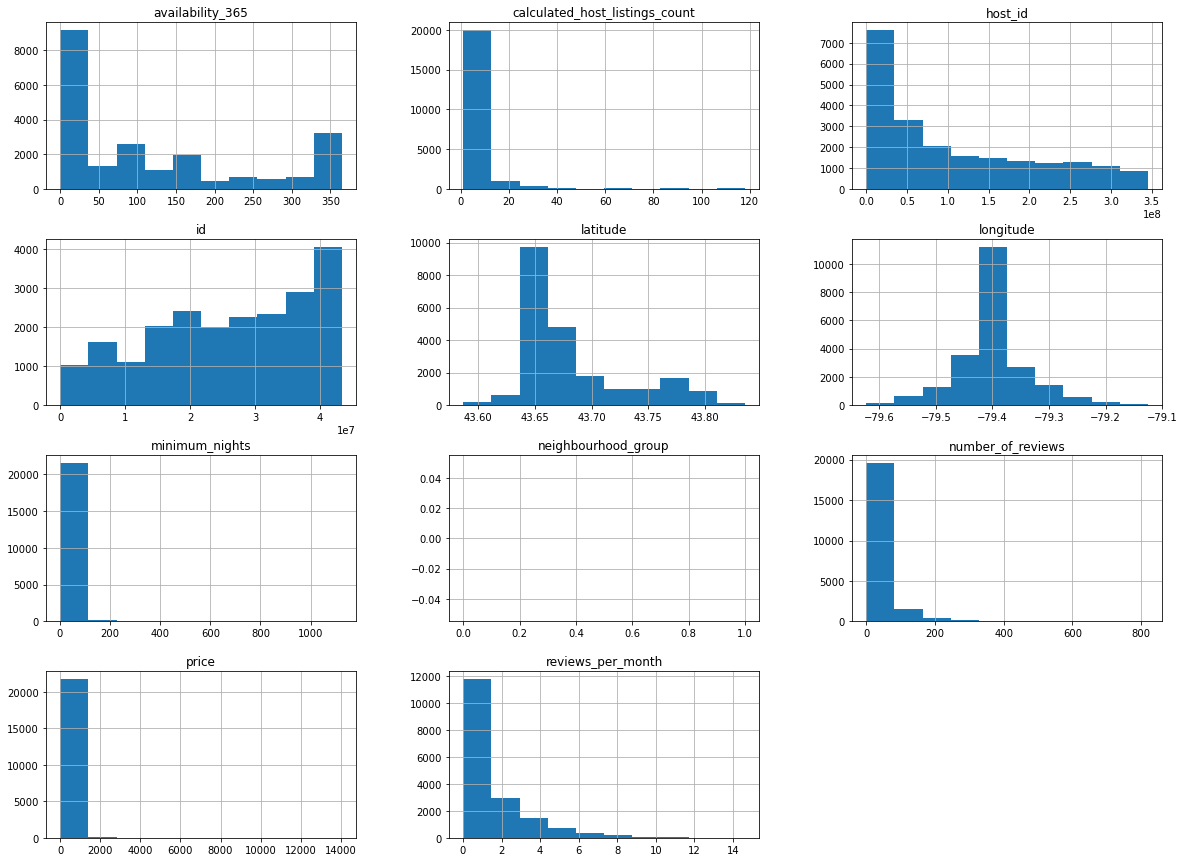

In [6]:
# Plotando histogramas relacionados à variável numérica
df_toronto.hist(bins=10, figsize=(20,15));

#### 3.4 Conferindo a presença de outliers

Pela distribuição do histograma, é possível verificar indícios da presença de *outliers* (os tais dados desproporcionais), analisando os gráficos referentes as colunas `price`, `minimum_nigths` e `calculated_host_listings_count`, os valores não seguem uma distribuição, e distorcem toda a representação gráfica. 

Para confirmar estes indícios, há duas maneiras rápidas que auxiliam a detecção de *outliers*. São elas:
* Resumo estatístico por meio do método `describe()`
* Plotar `boxplots` para a variável.

In [7]:
# Visualizando o resumo estatístico das variáveis que deram os indícios de outlier
df_toronto[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,21771.000000,21771.000000,21771.000000,17566.000000,21771.000000,21771.000000
mean,144.614855,8.520417,28.167976,1.490266,5.064489,118.803822
std,297.619621,30.923437,53.018686,1.817760,12.230018,131.096867
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,65.000000,1.000000,1.000000,0.260000,1.000000,0.000000
50%,100.000000,2.000000,7.000000,0.770000,1.000000,83.000000
75%,155.000000,5.000000,30.000000,2.050000,4.000000,201.000000
max,14058.000000,1125.000000,820.000000,14.620000,118.000000,365.000000


Olhando o resumo estatístico então, podemos concluir algumas hipóteses como:

* A variável `price` possui 75% do valor abaixo de 155, porém seu valor máximo é 14058.
* A varável `minimum_nights` quando observada referente ao número de dias máximos que alguém aluga o local, está acima de 365 dias no ano.

**Boxplot para minimum_nights:**

O boxplot (gráfico de caixa) é um gráfico utilizado para avaliar a distribuição empírica dos dados.


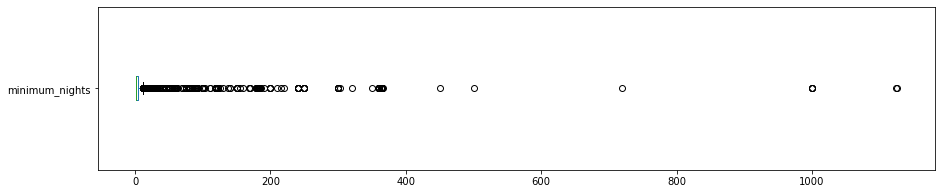

Valores acima de 30 dias na coluna minimum_nights: 560 
A porcentagem que representa o valor acima obtido: 2.5722%


In [8]:
# minimum_nights
df_toronto.minimum_nights.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

# Visualizando a quantidade de valores acima de 30 dias para minimum_nights
print(("Valores acima de 30 dias na coluna minimum_nights:"),("{} ".format(len(df_toronto[df_toronto.minimum_nights > 30]))))
print("A porcentagem que representa o valor acima obtido: {:.4f}%".format((len(df_toronto[df_toronto.minimum_nights > 30]) / df_toronto.shape[0])*100))

**Boxplot para price:**

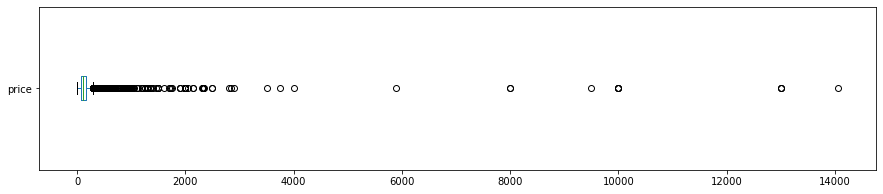

Valores acima 1300,00 na coluna price: 78 
A porcentagem que representa o valor: 0.3583%


In [9]:
# minimum_nights
df_toronto.price.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

# Visualizando a quantidade de valores 1300,00 para coluna price
print(("Valores acima 1300,00 na coluna price:"),("{} ".format(len(df_toronto[df_toronto.price > 1300]))))
print("A porcentagem que representa o valor: {:.4f}%".format((len(df_toronto[df_toronto.price > 1300]) / df_toronto.shape[0])*100))

#### 3.5 Retirando outliers

Já que foram identificados outliers nas variáveis `price` e `minimum_nights`, é necessário a fim de obter dados mais precisos, limpar o DataFrame e plotar novamente o histograma.

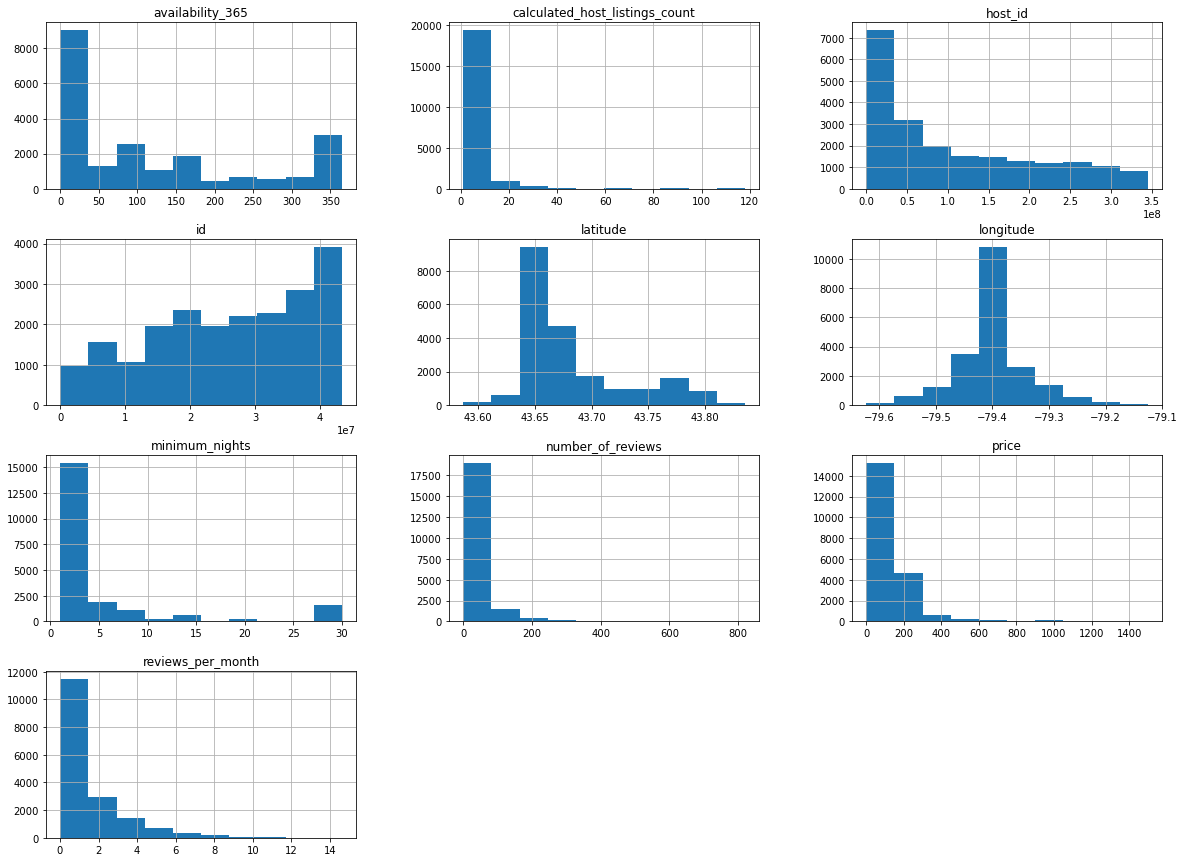

In [10]:
# Removendo outliers em um novo DataFrame
df_clean = df_toronto.copy()
df_clean.drop(df_clean[df_clean.price > 1500].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 30].index, axis=0, inplace=True)

# Removendo a coluna `neighbourhood_group`, pois está vazio
df_clean.drop('neighbourhood_group', axis=1, inplace=True)

# Plotando o novo histograma para as variáveis numéricas agora sem os outliers
df_clean.hist(bins=10, figsize=(20,15));

#### 3.6 Qual a correlação existente entre as variáveis?

Uma vez que correlação se trata do fato de existir uma relação entre duas coisas, neste contexto, estamos buscando então alguma relação ou semelhança entre duas variáveis.

Essa relação pode ser medida, e é função do coeficiente de correlação estabelecer qual a intensidade dela para com outra variável e para identificar as correlações existentes entre as variáveis de interesse, é necessário:

* Criar uma matriz de correlação
* Gerar um *heatmap* a partir dessa matriz, usando a biblioteca `seaborn`

In [11]:
# Criando uma matriz de correlação para algumas variáveis
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr()

display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,-0.008844,-0.019456,0.044828,0.038130,0.026805
minimum_nights,-0.008844,1.000000,-0.028788,-0.030141,0.059883,0.106337
number_of_reviews,-0.019456,-0.028788,1.000000,0.745047,-0.046584,0.085859
reviews_per_month,0.044828,-0.030141,0.745047,1.000000,-0.042972,0.054129
calculated_host_listings_count,0.038130,0.059883,-0.046584,-0.042972,1.000000,0.136333
availability_365,0.026805,0.106337,0.085859,0.054129,0.136333,1.000000


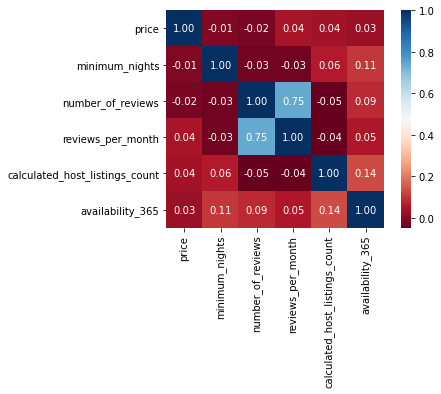

In [12]:
# Gerando o heatmap das variáveis
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

Observando agora o mapa é mais fácil notar o quanto pode uma váriavel interferir de forma positiva ou negativa em outra, e com isso basta uma análise mais experiente para conseguir agregar grandes descobertas ao projeto.

#### 3.7 Qual o tipo de imóvel mais alugado?

A coluna da variável `room_type` indica o tipo de locação que está anunciada no Airbnb, uma vez  que existem opções de apartamentos/casas inteiras, apenas o aluguel de um quarto ou mesmo dividir o quarto com outras pessoas.

Este calculo é possível de ser feito contando a quantidade de ocorrências de cada tipo de aluguel no DataFrame e para isso é usado o método `value_counts()`.

In [13]:
# Contando o número de aparições de cada tipo de locação
df_clean.room_type.value_counts()

Entire home/apt    13464
Private room        7218
Shared room          392
Hotel room            73
Name: room_type, dtype: int64

In [14]:
# Correspodencia em porcentagem de cada tipo de locação disponível
percentage_of_room_type = (df_clean.room_type.value_counts() / df_clean.shape[0]) * 100
print(percentage_of_room_type.round(2))

Entire home/apt    63.67
Private room       34.13
Shared room         1.85
Hotel room          0.35
Name: room_type, dtype: float64


#### 3.8 Qual a localidade mais cara de Toronto

Uma maneira de verificar uma variável em função de outra, é usando `groupby()`. No caso, queremos comparar os bairros (a coluna *neighbourhoods*) a partir do preço de locação (coluna *price*).

In [15]:
# Checando a média dos valores dos 10 bairros mais caros de Toronto
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

neighbourhood
Kingsway South                       201.263158
Rosedale-Moore Park                  197.150943
Waterfront Communities-The Island    189.141956
Forest Hill South                    187.250000
Lawrence Park South                  177.507937
Leaside-Bennington                   171.360000
Casa Loma                            171.084507
Yonge-St.Clair                       169.862500
Niagara                              163.991453
The Beaches                          163.777778
Name: price, dtype: float64

Acima então, é notado que bairros como Kingsway South, Rosedale-Moore Park e Waterfront Communities-The Island, estão com uma média de preço superior a de lugares como Yorkville ou Downtown.

Com isso qualquer pessoa que não conheça Toronto poderia facilmente apresentar esses resultados sem se questionar se de fato é certo esses bairros serem mais caros do que aqueles considerados melhores. Só para dar um único exemplo de como uma amostra pode ser não-representativa, veja quantas entradas há em Kingsway South .

In [16]:
# Quantidade de imóveis em Kingsway South
print(df_clean[df_clean.neighbourhood == "Kingsway South"].shape[0])
df_clean[df_clean.neighbourhood == "Kingsway South"].sample(5)

19


,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
14588,34367927,Spacious quiet apartment west end Toronto,7087414,Claire,Kingsway South,43.65934,-79.50626,Entire home/apt,129,6,11,2020-02-05,1.18,1,344
20816,42565982,"Private suite close to Airport, downtown, subway",339066952,Perry,Kingsway South,43.65798,-79.50392,Entire home/apt,96,1,0,NaN,NaN,1,156
1614,6167923,Home in The Kingsway,31532062,Nicola,Kingsway South,43.65068,-79.51915,Entire home/apt,749,1,0,NaN,NaN,1,0
7554,20788019,Luxury on The Kingsway - Book now,149008682,Helena,Kingsway South,43.65955,-79.51053,Private room,55,2,100,2019-11-10,3.10,1,180
2409,7915935,Beautiful ravine house,16529722,Fred,Kingsway South,43.65165,-79.49912,Entire home/apt,450,2,52,2020-03-17,0.95,3,331


Ou seja, em um DataFrame onde você possui 21147 linhas, ter apenas 19 ali e com preços que variam muito, pode identificar de que esta não é a realidade 

#### 3.9 Plotando a localização de cada locação em Toronto

Como é disponibilizado em meio aos dados a latitude e a longitude de cada locação, é interessante está análise para identificar onde as pessoas disponibilizam mais imóveis para locação e se há algum fator que leve a isso, seja maiores centros comerciais ou até praias próximas.

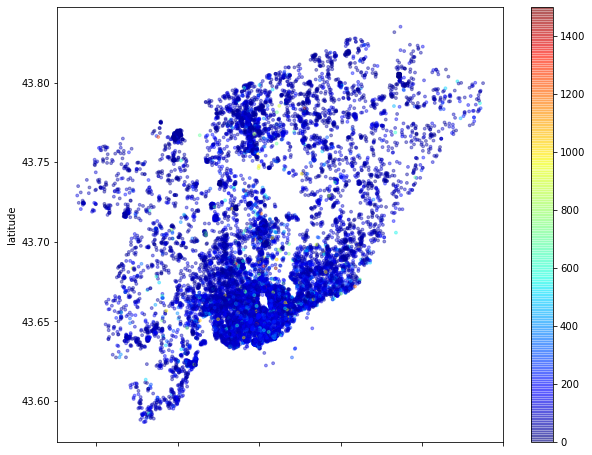

In [17]:
# Plotando os imóveis pela latitude-longitude
df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(10,8));

<div>
    <left
          >
            <img width="60%" src="https://www.orangesmile.com/common/img_city_maps/toronto-map-0.jpg">
        <p></p>
            <p>No caso da cidade de Toronto, analisando os plots e a imagem, é possível perceber que a concentração maior de possíveis locações se concentra ao redor do Aeroporto Intenacional Pearson de Toronto.</p>
    </left>
</div>

---
## 4. Conclusão

Neste notebook foi feita somente uma análise superficial na base de dados do Airbnb de Toronto, porém que trouxe alguns fatores importantes como  a existencia de *outliers* em algumas das variáveis, seus impactos nas análises e até mesmo a forma como uma variável pode interferir em outra

Também foi possível notar que em algumas localidades há poucos imóveis disponíveis, o que pode distorcer as informações estatísticas de alguns atributos.

Por fim, é necessário relembrar que este *dataset* é uma versão resumida, ideal apenas para uma abordagem inicial. Recomenda-se que seja usado, em uma próxima análise exploratória, o conjunto de dados completos, com todos os 106 atributos disponíveis.